In [2]:
#!pip install git+https://github.com/aimclub/FEDOT.git

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [6]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp']['value'].to_numpy()
ts_real_traffic = ts_tabular[ts_tabular['label']=='traffic_volume'].to_numpy()
ts_real_oil = ts_tabular[ts_tabular['label']=='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)']['value'].to_numpy()
#ts_tabular.label.value_counts()

FileNotFoundError: ignored

In [31]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans


def s7(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1+r*np.sin(np.pi*r/48)/np.log(r+2)
    noise_coeff = np.log(r+1)
    noise = np.random.normal(loc=0,scale = noise_coeff*noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

In [32]:
horizon = 100
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 2000
end = 3000
series = 5

if series == 'oil':
  init_series = ts_real_oil
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'traffic':
  init_series = ts_real_traffic
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'temp':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]  
    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]   

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
 
idx = np.array( range(len(np.array(ts))) )
train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=5,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

In [33]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-12-01 16:36:33,143 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 16:36:33,156 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:36:33,170 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 16:36:33,179 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:36:33,190 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-12-01 16:36:33,197 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-12-01 16:36:33,404 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 16:36:33,755 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:36:33,760 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 16:36:33,767 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:36:33,774 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 16:36:33,783 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-12-01 16:36:33,796 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-12-01 16:36:33,810 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.7 sec.


2022-12-01 16:36:33,820 - ApiComposer - Initial pipeline was fitted in 0.7 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['scaling', 'locf', 'dtreg', 'smoothing', 'diff_filter', 'ar', 'arima', 'glm', 'sgdr', 'stl_arima', 'lagged', 'ridge', 'lasso', 'normalization', 'sparse_lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'adareg', 'linear', 'ets', 'cut', 'fast_ica', 'pca'].


2022-12-01 16:36:33,852 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['scaling', 'locf', 'dtreg', 'smoothing', 'diff_filter', 'ar', 'arima', 'glm', 'sgdr', 'stl_arima', 'lagged', 'ridge', 'lasso', 'normalization', 'sparse_lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'adareg', 'linear', 'ets', 'cut', 'fast_ica', 'pca'].


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-12-01 16:36:33,861 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-12-01 16:36:33,867 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 16:36:33,876 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-12-01 16:36:45,046 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=11.766 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 16:36:45,057 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=11.766 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 16:36:46,446 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-12-01 16:40:41,537 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=9.830 ComplexityMetricsEnum.node_num=0.300>']


2022-12-01 16:40:41,545 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=9.830 ComplexityMetricsEnum.node_num=0.300>']


CRITICAL:root:GroupedCondition - Optimisation stopped: Time limit is reached


2022-12-01 16:40:41,550 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:  33%|███▎      | 1/3 [04:07<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 4.128 min


2022-12-01 16:40:41,556 - OptimisationTimer - Composition time: 4.128 min


INFO:root:OptimisationTimer - Algorithm was terminated due to processing time limit


2022-12-01 16:40:41,560 - OptimisationTimer - Algorithm was terminated due to processing time limit


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-12-01 16:40:41,564 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=9.830 ComplexityMetricsEnum.node_num=0.300>']


2022-12-01 16:40:41,567 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=9.830 ComplexityMetricsEnum.node_num=0.300>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 16:40:41,571 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 4.1 min


2022-12-01 16:40:41,574 - EvoGraphOptimizer - spent time: 4.1 min


INFO:root:GPComposer - GP composition finished


2022-12-01 16:40:41,580 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-12-01 16:40:41,996 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-12-01 16:40:42,228 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10}


2022-12-01 16:40:42,239 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 16:40:42,254 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:40:42,271 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 16:40:42,281 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 16:40:42,298 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 16:40:42,310 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


2022-12-01 16:41:06,043 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,050 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,054 - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,061 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,068 - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,074 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,081 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,088 - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,095 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,102 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,109 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,112 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,116 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2022-12-01 16:41:06,119 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,122 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,126 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,129 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,133 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2022-12-01 16:41:06,137 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,140 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,144 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,147 - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,150 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,153 - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,156 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


2022-12-01 16:41:06,160 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,163 - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,166 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,169 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2022-12-01 16:41:06,173 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2022-12-01 16:41:06,176 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,180 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,183 - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,187 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,190 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,193 - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2022-12-01 16:41:06,197 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2022-12-01 16:41:06,200 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,204 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,207 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


2022-12-01 16:41:06,210 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,213 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,217 - findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,220 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,223 - findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,227 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


2022-12-01 16:41:06,230 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,234 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,238 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-12-01 16:41:06,241 - findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,244 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


2022-12-01 16:41:06,248 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


2022-12-01 16:41:06,251 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-12-01 16:41:06,254 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


2022-12-01 16:41:06,258 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


2022-12-01 16:41:06,261 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-12-01 16:41:06,265 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


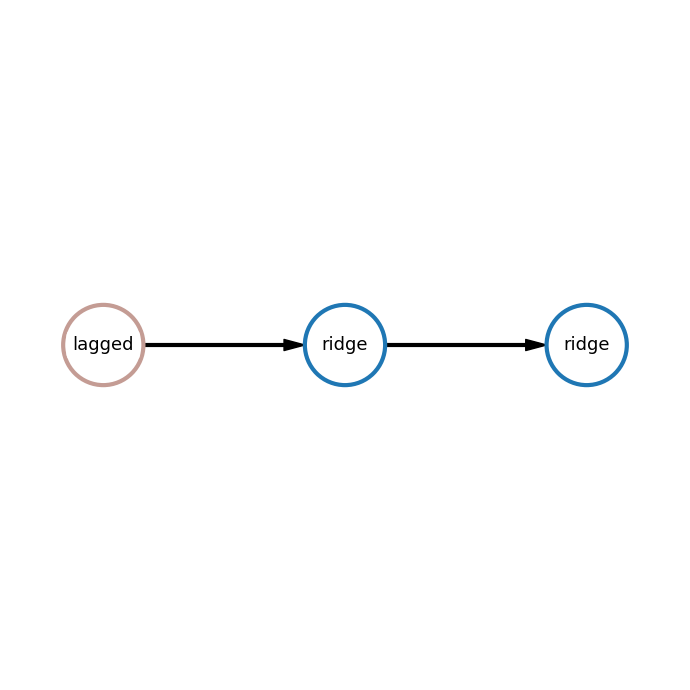

In [34]:
pipeline.show()

In [14]:
#!pip install matplotlib==3.1.3

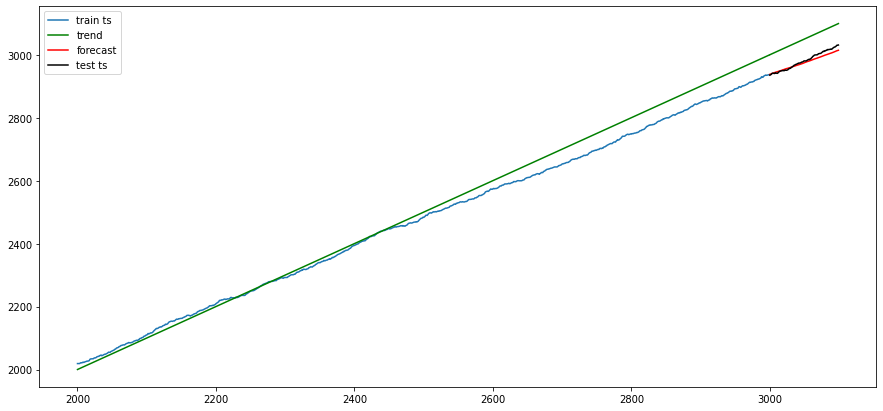

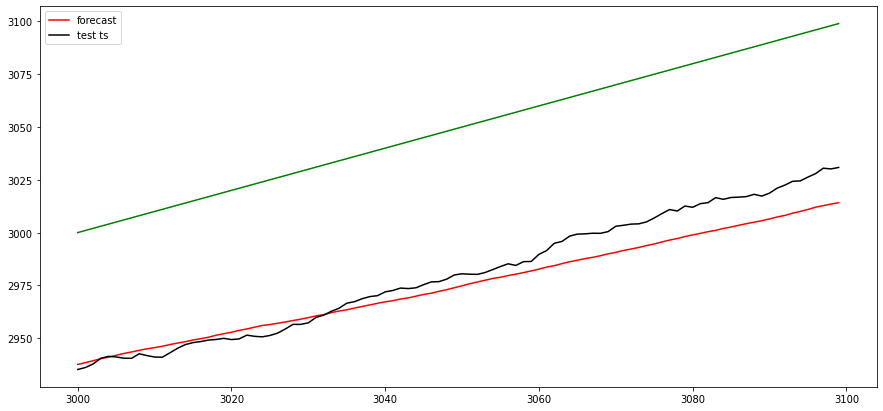

In [35]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [36]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [37]:
#importing for tuning

from fedot.core.pipelines.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 16:42:17,981 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 16:42:17,988 - DataSourceSplitter - Hold out validation is applied.


In [38]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [39]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-2]:
         fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))
    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-2]: #[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [40]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

Fitting pipeline №1


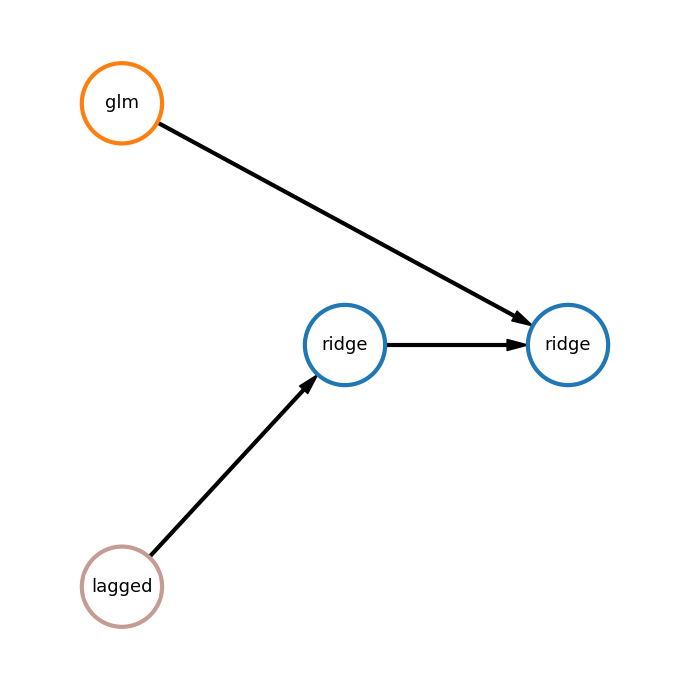

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:42:50,735 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10.06818054905099} 
Initial metric: 1.350


2022-12-01 16:42:51,244 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10.06818054905099} 
Initial metric: 1.350
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009689 seconds


2022-12-01 16:42:51,285 - build_posterior_wrapper took 0.009689 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:42:51,295 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008994 seconds


2022-12-01 16:42:51,867 - build_posterior_wrapper took 0.008994 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.909413


2022-12-01 16:42:51,876 - TPE using 1/1 trials with best loss 0.909413
 20%|██        | 2/10 [00:00<00:05,  1.51trial/s, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010248 seconds


2022-12-01 16:42:52,536 - build_posterior_wrapper took 0.010248 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.909413


2022-12-01 16:42:52,547 - TPE using 2/2 trials with best loss 0.909413
 30%|███       | 3/10 [00:02<00:09,  1.32s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006757 seconds


2022-12-01 16:42:54,317 - build_posterior_wrapper took 0.006757 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.909413


2022-12-01 16:42:54,327 - TPE using 3/3 trials with best loss 0.909413
 40%|████      | 4/10 [00:03<00:07,  1.23s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006178 seconds


2022-12-01 16:42:55,437 - build_posterior_wrapper took 0.006178 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.909413


2022-12-01 16:42:55,442 - TPE using 4/4 trials with best loss 0.909413
 50%|█████     | 5/10 [00:04<00:05,  1.13s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007023 seconds


2022-12-01 16:42:56,424 - build_posterior_wrapper took 0.007023 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.909413


2022-12-01 16:42:56,430 - TPE using 5/5 trials with best loss 0.909413
 60%|██████    | 6/10 [00:05<00:04,  1.11s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004464 seconds


2022-12-01 16:42:57,491 - build_posterior_wrapper took 0.004464 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.909413


2022-12-01 16:42:57,505 - TPE using 6/6 trials with best loss 0.909413
 70%|███████   | 7/10 [00:07<00:04,  1.47s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012319 seconds


2022-12-01 16:42:59,675 - build_posterior_wrapper took 0.012319 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.909413


2022-12-01 16:42:59,691 - TPE using 7/7 trials with best loss 0.909413
 80%|████████  | 8/10 [00:08<00:02,  1.38s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007578 seconds


2022-12-01 16:43:00,861 - build_posterior_wrapper took 0.007578 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.909413


2022-12-01 16:43:00,869 - TPE using 8/8 trials with best loss 0.909413
 90%|█████████ | 9/10 [00:09<00:01,  1.14s/trial, best loss: 0.9094130693288512]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005619 seconds


2022-12-01 16:43:01,469 - build_posterior_wrapper took 0.005619 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.909413


2022-12-01 16:43:01,476 - TPE using 9/9 trials with best loss 0.909413
100%|██████████| 10/10 [00:10<00:00,  1.15s/trial, best loss: 0.9094130693288512]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:02,799 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.909 equal or better than initial (+ 5% deviation) 1.418


2022-12-01 16:43:02,809 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.909 equal or better than initial (+ 5% deviation) 1.418


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099}


2022-12-01 16:43:02,814 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099}


CRITICAL:root:PipelineTuner - Final metric: 0.909


2022-12-01 16:43:02,821 - PipelineTuner - Final metric: 0.909


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:03,450 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099} 
Initial metric: 7.687


2022-12-01 16:43:04,016 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099} 
Initial metric: 7.687
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006532 seconds


2022-12-01 16:43:04,057 - build_posterior_wrapper took 0.006532 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:04,065 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004716 seconds


2022-12-01 16:43:04,643 - build_posterior_wrapper took 0.004716 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 7.605474


2022-12-01 16:43:04,659 - TPE using 1/1 trials with best loss 7.605474
 20%|██        | 2/10 [00:01<00:09,  1.24s/trial, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004585 seconds


2022-12-01 16:43:05,883 - build_posterior_wrapper took 0.004585 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 7.605474


2022-12-01 16:43:05,904 - TPE using 2/2 trials with best loss 7.605474
 30%|███       | 3/10 [00:01<00:06,  1.15trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004441 seconds


2022-12-01 16:43:06,499 - build_posterior_wrapper took 0.004441 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 7.605474


2022-12-01 16:43:06,518 - TPE using 3/3 trials with best loss 7.605474
 40%|████      | 4/10 [00:02<00:05,  1.10trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006713 seconds


2022-12-01 16:43:07,459 - build_posterior_wrapper took 0.006713 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 7.605474


2022-12-01 16:43:07,465 - TPE using 4/4 trials with best loss 7.605474
 50%|█████     | 5/10 [00:03<00:03,  1.27trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005152 seconds


2022-12-01 16:43:08,050 - build_posterior_wrapper took 0.005152 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 7.605474


2022-12-01 16:43:08,056 - TPE using 5/5 trials with best loss 7.605474
 60%|██████    | 6/10 [00:03<00:02,  1.42trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004401 seconds


2022-12-01 16:43:08,619 - build_posterior_wrapper took 0.004401 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 7.605474


2022-12-01 16:43:08,634 - TPE using 6/6 trials with best loss 7.605474
 70%|███████   | 7/10 [00:05<00:02,  1.01trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010149 seconds


2022-12-01 16:43:10,168 - build_posterior_wrapper took 0.010149 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 7.605474


2022-12-01 16:43:10,181 - TPE using 7/7 trials with best loss 7.605474
 80%|████████  | 8/10 [00:06<00:01,  1.12trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005364 seconds


2022-12-01 16:43:10,867 - build_posterior_wrapper took 0.005364 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 7.605474


2022-12-01 16:43:10,871 - TPE using 8/8 trials with best loss 7.605474
 90%|█████████ | 9/10 [00:07<00:00,  1.11trial/s, best loss: 7.605474411563615]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006747 seconds


2022-12-01 16:43:11,773 - build_posterior_wrapper took 0.006747 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 7.605474


2022-12-01 16:43:11,785 - TPE using 9/9 trials with best loss 7.605474
100%|██████████| 10/10 [00:07<00:00,  1.15trial/s, best loss: 7.605474411563615]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:13,023 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.605 equal or better than initial (+ 5% deviation) 8.071


2022-12-01 16:43:13,030 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.605 equal or better than initial (+ 5% deviation) 8.071


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099}


2022-12-01 16:43:13,037 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 3.358459183471424}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 4.037366848844316}
lagged - {'window_size': 10.06818054905099}


CRITICAL:root:PipelineTuner - Final metric: 7.605


2022-12-01 16:43:13,043 - PipelineTuner - Final metric: 7.605
Fitting pipeline №2


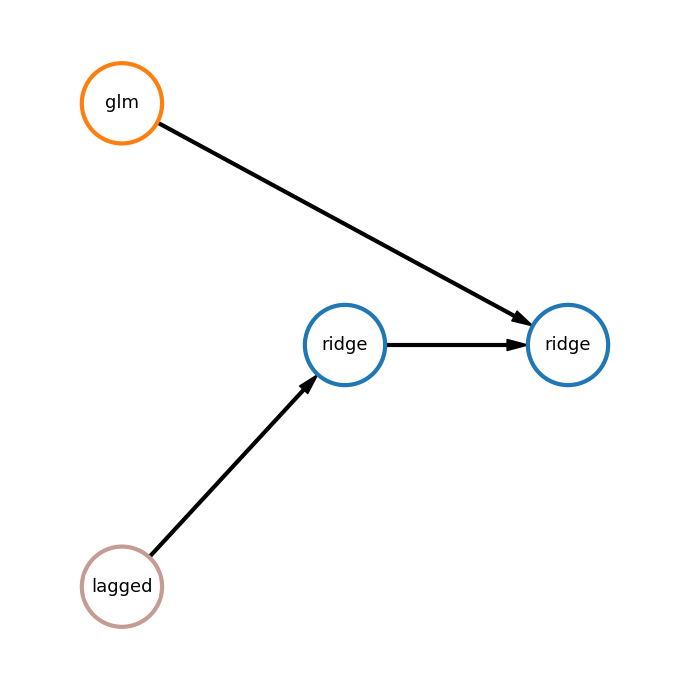

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:14,056 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.350


2022-12-01 16:43:14,580 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.350
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004434 seconds


2022-12-01 16:43:14,613 - build_posterior_wrapper took 0.004434 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:14,629 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004369 seconds


2022-12-01 16:43:15,253 - build_posterior_wrapper took 0.004369 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.902866


2022-12-01 16:43:15,259 - TPE using 1/1 trials with best loss 0.902866
 20%|██        | 2/10 [00:02<00:20,  2.58s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004474 seconds


2022-12-01 16:43:17,836 - build_posterior_wrapper took 0.004474 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.902866


2022-12-01 16:43:17,842 - TPE using 2/2 trials with best loss 0.902866
 30%|███       | 3/10 [00:03<00:10,  1.45s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008801 seconds


2022-12-01 16:43:18,509 - build_posterior_wrapper took 0.008801 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.902866


2022-12-01 16:43:18,517 - TPE using 3/3 trials with best loss 0.902866
 40%|████      | 4/10 [00:05<00:09,  1.65s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009230 seconds


2022-12-01 16:43:20,402 - build_posterior_wrapper took 0.009230 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.902866


2022-12-01 16:43:20,409 - TPE using 4/4 trials with best loss 0.902866
 50%|█████     | 5/10 [00:06<00:07,  1.42s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009012 seconds


2022-12-01 16:43:21,467 - build_posterior_wrapper took 0.009012 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.902866


2022-12-01 16:43:21,475 - TPE using 5/5 trials with best loss 0.902866
 60%|██████    | 6/10 [00:08<00:07,  1.76s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010437 seconds


2022-12-01 16:43:23,820 - build_posterior_wrapper took 0.010437 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.902866


2022-12-01 16:43:23,825 - TPE using 6/6 trials with best loss 0.902866
 70%|███████   | 7/10 [00:09<00:04,  1.62s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009626 seconds


2022-12-01 16:43:25,167 - build_posterior_wrapper took 0.009626 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.902866


2022-12-01 16:43:25,187 - TPE using 7/7 trials with best loss 0.902866
 80%|████████  | 8/10 [00:10<00:02,  1.37s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004650 seconds


2022-12-01 16:43:26,005 - build_posterior_wrapper took 0.004650 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.902866


2022-12-01 16:43:26,011 - TPE using 8/8 trials with best loss 0.902866
 90%|█████████ | 9/10 [00:11<00:01,  1.15s/trial, best loss: 0.902865703412001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009745 seconds


2022-12-01 16:43:26,707 - build_posterior_wrapper took 0.009745 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.902866


2022-12-01 16:43:26,722 - TPE using 9/9 trials with best loss 0.902866
100%|██████████| 10/10 [00:12<00:00,  1.36s/trial, best loss: 0.902865703412001]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:28,048 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.903 equal or better than initial (+ 5% deviation) 1.418


2022-12-01 16:43:28,062 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.903 equal or better than initial (+ 5% deviation) 1.418


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10}


2022-12-01 16:43:28,071 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 0.903


2022-12-01 16:43:28,076 - PipelineTuner - Final metric: 0.903


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:28,632 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10} 
Initial metric: 7.485


2022-12-01 16:43:29,212 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10} 
Initial metric: 7.485
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004868 seconds


2022-12-01 16:43:29,246 - build_posterior_wrapper took 0.004868 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:29,257 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008277 seconds


2022-12-01 16:43:29,836 - build_posterior_wrapper took 0.008277 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 24.530780


2022-12-01 16:43:29,849 - TPE using 1/1 trials with best loss 24.530780
 20%|██        | 2/10 [00:01<00:09,  1.15s/trial, best loss: 17.484280991913852]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009237 seconds


2022-12-01 16:43:30,996 - build_posterior_wrapper took 0.009237 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 17.484281


2022-12-01 16:43:31,008 - TPE using 2/2 trials with best loss 17.484281
 30%|███       | 3/10 [00:01<00:06,  1.13trial/s, best loss: 14.7469639583734]  

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011374 seconds


2022-12-01 16:43:31,700 - build_posterior_wrapper took 0.011374 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 14.746964


2022-12-01 16:43:31,709 - TPE using 3/3 trials with best loss 14.746964
 40%|████      | 4/10 [00:02<00:05,  1.16trial/s, best loss: 14.7469639583734]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011850 seconds


2022-12-01 16:43:32,538 - build_posterior_wrapper took 0.011850 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 14.746964


2022-12-01 16:43:32,548 - TPE using 4/4 trials with best loss 14.746964
 50%|█████     | 5/10 [00:03<00:04,  1.25trial/s, best loss: 14.7469639583734]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010486 seconds


2022-12-01 16:43:33,242 - build_posterior_wrapper took 0.010486 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 14.746964


2022-12-01 16:43:33,249 - TPE using 5/5 trials with best loss 14.746964
 60%|██████    | 6/10 [00:05<00:04,  1.12s/trial, best loss: 14.7469639583734]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004518 seconds


2022-12-01 16:43:34,910 - build_posterior_wrapper took 0.004518 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 14.746964


2022-12-01 16:43:34,924 - TPE using 6/6 trials with best loss 14.746964
 70%|███████   | 7/10 [00:06<00:03,  1.25s/trial, best loss: 14.7469639583734]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009326 seconds


2022-12-01 16:43:36,423 - build_posterior_wrapper took 0.009326 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 14.746964


2022-12-01 16:43:36,433 - TPE using 7/7 trials with best loss 14.746964
 80%|████████  | 8/10 [00:07<00:02,  1.11s/trial, best loss: 14.7469639583734]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004414 seconds


2022-12-01 16:43:37,249 - build_posterior_wrapper took 0.004414 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 14.746964


2022-12-01 16:43:37,262 - TPE using 8/8 trials with best loss 14.746964
 90%|█████████ | 9/10 [00:08<00:00,  1.03trial/s, best loss: 14.71239790883792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004462 seconds


2022-12-01 16:43:37,902 - build_posterior_wrapper took 0.004462 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 14.712398


2022-12-01 16:43:37,918 - TPE using 9/9 trials with best loss 14.712398
100%|██████████| 10/10 [00:08<00:00,  1.01trial/s, best loss: 14.71239790883792]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:39,374 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 14.712 worse than initial (+ 5% deviation) 7.860


2022-12-01 16:43:39,381 - PipelineTuner - Return init pipeline due to the fact that obtained metric 14.712 worse than initial (+ 5% deviation) 7.860


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10}


2022-12-01 16:43:39,395 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 0.5776784207053743}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 5.362447898366953}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 14.712


2022-12-01 16:43:39,403 - PipelineTuner - Final metric: 14.712
Fitting pipeline №3


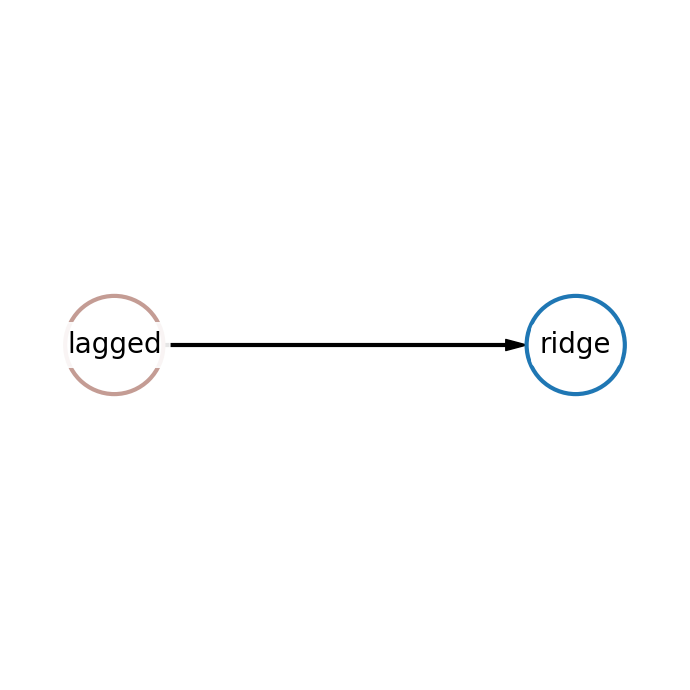

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:40,416 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 2.322


2022-12-01 16:43:40,598 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 2.322
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001431 seconds


2022-12-01 16:43:40,610 - build_posterior_wrapper took 0.001431 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:40,618 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001576 seconds


2022-12-01 16:43:40,878 - build_posterior_wrapper took 0.001576 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.322568


2022-12-01 16:43:40,889 - TPE using 1/1 trials with best loss 2.322568
 20%|██        | 2/10 [00:01<00:11,  1.47s/trial, best loss: 2.3225684713805568]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001251 seconds


2022-12-01 16:43:42,353 - build_posterior_wrapper took 0.001251 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.322568


2022-12-01 16:43:42,365 - TPE using 2/2 trials with best loss 2.322568
 30%|███       | 3/10 [00:01<00:06,  1.09trial/s, best loss: 1.8632107369910726]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001276 seconds


2022-12-01 16:43:42,882 - build_posterior_wrapper took 0.001276 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.863211


2022-12-01 16:43:42,897 - TPE using 3/3 trials with best loss 1.863211
 40%|████      | 4/10 [00:02<00:05,  1.10trial/s, best loss: 1.8632107369910726]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001255 seconds


2022-12-01 16:43:43,777 - build_posterior_wrapper took 0.001255 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.863211


2022-12-01 16:43:43,789 - TPE using 4/4 trials with best loss 1.863211
 50%|█████     | 5/10 [00:04<00:06,  1.21s/trial, best loss: 1.8632107369910726]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001292 seconds


2022-12-01 16:43:45,456 - build_posterior_wrapper took 0.001292 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.863211


2022-12-01 16:43:45,479 - TPE using 5/5 trials with best loss 1.863211
 60%|██████    | 6/10 [00:04<00:03,  1.14trial/s, best loss: 1.8632107369910726]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008778 seconds


2022-12-01 16:43:45,737 - build_posterior_wrapper took 0.008778 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.863211


2022-12-01 16:43:45,753 - TPE using 6/6 trials with best loss 1.863211
 70%|███████   | 7/10 [00:05<00:02,  1.34trial/s, best loss: 1.489866348637132] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001272 seconds


2022-12-01 16:43:46,226 - build_posterior_wrapper took 0.001272 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.489866


2022-12-01 16:43:46,238 - TPE using 7/7 trials with best loss 1.489866
 80%|████████  | 8/10 [00:07<00:02,  1.15s/trial, best loss: 1.489866348637132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001294 seconds


2022-12-01 16:43:48,211 - build_posterior_wrapper took 0.001294 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.489866


2022-12-01 16:43:48,227 - TPE using 8/8 trials with best loss 1.489866
 90%|█████████ | 9/10 [00:08<00:01,  1.00s/trial, best loss: 1.489866348637132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001285 seconds


2022-12-01 16:43:48,894 - build_posterior_wrapper took 0.001285 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.489866


2022-12-01 16:43:48,914 - TPE using 9/9 trials with best loss 1.489866
100%|██████████| 10/10 [00:08<00:00,  1.03trial/s, best loss: 1.489866348637132]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:50,109 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.490 equal or better than initial (+ 5% deviation) 2.438


2022-12-01 16:43:50,124 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.490 equal or better than initial (+ 5% deviation) 2.438


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 5.679091329112728}
lagged - {'window_size': 167}


2022-12-01 16:43:50,132 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 5.679091329112728}
lagged - {'window_size': 167}


CRITICAL:root:PipelineTuner - Final metric: 1.490


2022-12-01 16:43:50,157 - PipelineTuner - Final metric: 1.490


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:50,686 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 5.679091329112728}
lagged - {'window_size': 167} 
Initial metric: 13.150


2022-12-01 16:43:51,204 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 5.679091329112728}
lagged - {'window_size': 167} 
Initial metric: 13.150
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001446 seconds


2022-12-01 16:43:51,224 - build_posterior_wrapper took 0.001446 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:51,234 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001272 seconds


2022-12-01 16:43:51,768 - build_posterior_wrapper took 0.001272 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 13.150201


2022-12-01 16:43:51,777 - TPE using 1/1 trials with best loss 13.150201
 20%|██        | 2/10 [00:00<00:02,  3.77trial/s, best loss: 2.7097123103791123]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001290 seconds


2022-12-01 16:43:52,041 - build_posterior_wrapper took 0.001290 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.709712


2022-12-01 16:43:52,049 - TPE using 2/2 trials with best loss 2.709712
 30%|███       | 3/10 [00:00<00:03,  2.03trial/s, best loss: 2.7097123103791123]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001477 seconds


2022-12-01 16:43:52,686 - build_posterior_wrapper took 0.001477 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 2.709712


2022-12-01 16:43:52,700 - TPE using 3/3 trials with best loss 2.709712
 40%|████      | 4/10 [00:01<00:04,  1.34trial/s, best loss: 2.7097123103791123]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001361 seconds


2022-12-01 16:43:53,732 - build_posterior_wrapper took 0.001361 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 2.709712


2022-12-01 16:43:53,739 - TPE using 4/4 trials with best loss 2.709712
 50%|█████     | 5/10 [00:02<00:02,  1.84trial/s, best loss: 2.675052950413149] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001426 seconds


2022-12-01 16:43:53,969 - build_posterior_wrapper took 0.001426 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 2.675053


2022-12-01 16:43:53,976 - TPE using 5/5 trials with best loss 2.675053
 60%|██████    | 6/10 [00:04<00:04,  1.02s/trial, best loss: 2.675052950413149]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001264 seconds


2022-12-01 16:43:55,831 - build_posterior_wrapper took 0.001264 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 2.675053


2022-12-01 16:43:55,844 - TPE using 6/6 trials with best loss 2.675053
 70%|███████   | 7/10 [00:04<00:02,  1.21trial/s, best loss: 2.675052950413149]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003493 seconds


2022-12-01 16:43:56,299 - build_posterior_wrapper took 0.003493 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 2.675053


2022-12-01 16:43:56,314 - TPE using 7/7 trials with best loss 2.675053
 80%|████████  | 8/10 [00:06<00:02,  1.07s/trial, best loss: 2.675052950413149]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003095 seconds


2022-12-01 16:43:57,855 - build_posterior_wrapper took 0.003095 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 2.675053


2022-12-01 16:43:57,861 - TPE using 8/8 trials with best loss 2.675053
 90%|█████████ | 9/10 [00:06<00:00,  1.23trial/s, best loss: 2.5524501969552493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003840 seconds


2022-12-01 16:43:58,122 - build_posterior_wrapper took 0.003840 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 2.552450


2022-12-01 16:43:58,138 - TPE using 9/9 trials with best loss 2.552450
100%|██████████| 10/10 [00:06<00:00,  1.34trial/s, best loss: 2.5524501969552493]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:43:58,727 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 2.552 equal or better than initial (+ 5% deviation) 13.808


2022-12-01 16:43:58,739 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 2.552 equal or better than initial (+ 5% deviation) 13.808


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.107564627277068}
lagged - {'window_size': 17}


2022-12-01 16:43:58,747 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.107564627277068}
lagged - {'window_size': 17}


CRITICAL:root:PipelineTuner - Final metric: 2.552


2022-12-01 16:43:58,752 - PipelineTuner - Final metric: 2.552
Fitting pipeline №4


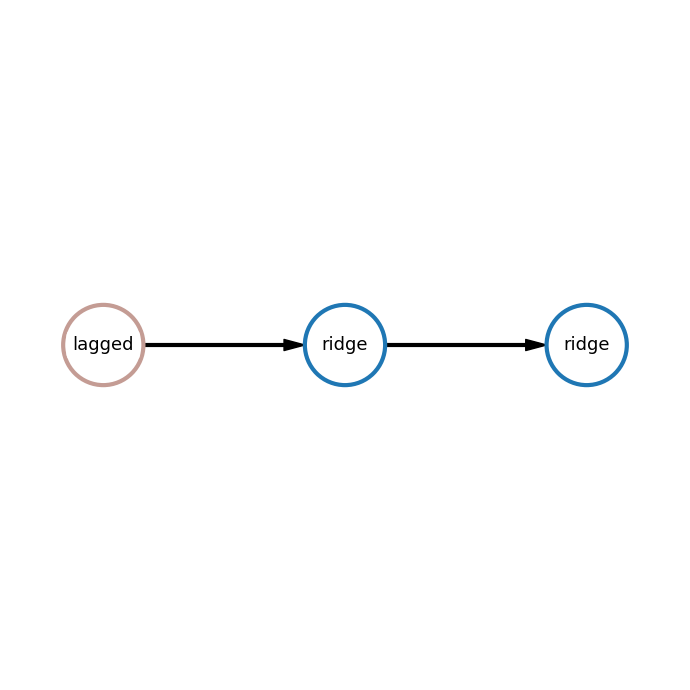

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:43:59,431 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 2.322


2022-12-01 16:43:59,653 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 2.322
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002664 seconds


2022-12-01 16:43:59,686 - build_posterior_wrapper took 0.002664 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:43:59,702 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002264 seconds


2022-12-01 16:43:59,977 - build_posterior_wrapper took 0.002264 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.321903


2022-12-01 16:43:59,987 - TPE using 1/1 trials with best loss 2.321903
 20%|██        | 2/10 [00:01<00:10,  1.28s/trial, best loss: 2.3219026363399804]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008005 seconds


2022-12-01 16:44:01,267 - build_posterior_wrapper took 0.008005 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.321903


2022-12-01 16:44:01,282 - TPE using 2/2 trials with best loss 2.321903
 30%|███       | 3/10 [00:01<00:05,  1.30trial/s, best loss: 1.0519457412156257]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008703 seconds


2022-12-01 16:44:01,685 - build_posterior_wrapper took 0.008703 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.051946


2022-12-01 16:44:01,697 - TPE using 3/3 trials with best loss 1.051946
 40%|████      | 4/10 [00:02<00:03,  1.66trial/s, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002112 seconds


2022-12-01 16:44:02,078 - build_posterior_wrapper took 0.002112 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.023389


2022-12-01 16:44:02,092 - TPE using 4/4 trials with best loss 1.023389
 50%|█████     | 5/10 [00:03<00:04,  1.11trial/s, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009242 seconds


2022-12-01 16:44:03,441 - build_posterior_wrapper took 0.009242 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.023389


2022-12-01 16:44:03,446 - TPE using 5/5 trials with best loss 1.023389
 60%|██████    | 6/10 [00:04<00:03,  1.05trial/s, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002071 seconds


2022-12-01 16:44:04,475 - build_posterior_wrapper took 0.002071 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.023389


2022-12-01 16:44:04,489 - TPE using 6/6 trials with best loss 1.023389
 70%|███████   | 7/10 [00:06<00:03,  1.26s/trial, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001829 seconds


2022-12-01 16:44:06,343 - build_posterior_wrapper took 0.001829 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.023389


2022-12-01 16:44:06,369 - TPE using 7/7 trials with best loss 1.023389
 80%|████████  | 8/10 [00:07<00:02,  1.09s/trial, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002358 seconds


2022-12-01 16:44:07,082 - build_posterior_wrapper took 0.002358 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.023389


2022-12-01 16:44:07,094 - TPE using 8/8 trials with best loss 1.023389
 90%|█████████ | 9/10 [00:08<00:01,  1.24s/trial, best loss: 1.0233894354983457]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002024 seconds


2022-12-01 16:44:08,644 - build_posterior_wrapper took 0.002024 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.023389


2022-12-01 16:44:08,655 - TPE using 9/9 trials with best loss 1.023389
100%|██████████| 10/10 [00:10<00:00,  1.16s/trial, best loss: 1.0233894354983457]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:44:10,758 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.023 equal or better than initial (+ 5% deviation) 2.438


2022-12-01 16:44:10,762 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.023 equal or better than initial (+ 5% deviation) 2.438


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 6.425701669800815}
ridge - {'alpha': 7.078245527261148}
lagged - {'window_size': 98}


2022-12-01 16:44:10,775 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 6.425701669800815}
ridge - {'alpha': 7.078245527261148}
lagged - {'window_size': 98}


CRITICAL:root:PipelineTuner - Final metric: 1.023


2022-12-01 16:44:10,782 - PipelineTuner - Final metric: 1.023


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:44:11,181 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 6.425701669800815}
ridge - {'alpha': 7.078245527261148}
lagged - {'window_size': 98} 
Initial metric: 8.589


2022-12-01 16:44:11,563 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 6.425701669800815}
ridge - {'alpha': 7.078245527261148}
lagged - {'window_size': 98} 
Initial metric: 8.589
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006550 seconds


2022-12-01 16:44:11,600 - build_posterior_wrapper took 0.006550 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:44:11,611 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001821 seconds


2022-12-01 16:44:11,987 - build_posterior_wrapper took 0.001821 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 8.589286


2022-12-01 16:44:12,007 - TPE using 1/1 trials with best loss 8.589286
 20%|██        | 2/10 [00:00<00:04,  1.94trial/s, best loss: 8.589285553932745]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001751 seconds


2022-12-01 16:44:12,508 - build_posterior_wrapper took 0.001751 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 8.589286


2022-12-01 16:44:12,517 - TPE using 2/2 trials with best loss 8.589286
 30%|███       | 3/10 [00:01<00:05,  1.36trial/s, best loss: 8.589285553932745]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001760 seconds


2022-12-01 16:44:13,398 - build_posterior_wrapper took 0.001760 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 8.589286


2022-12-01 16:44:13,415 - TPE using 3/3 trials with best loss 8.589286
 40%|████      | 4/10 [00:01<00:03,  1.79trial/s, best loss: 3.464497298223333]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001744 seconds


2022-12-01 16:44:13,748 - build_posterior_wrapper took 0.001744 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 3.464497


2022-12-01 16:44:13,755 - TPE using 4/4 trials with best loss 3.464497
 50%|█████     | 5/10 [00:02<00:02,  2.18trial/s, best loss: 2.660029905610802]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001876 seconds


2022-12-01 16:44:14,051 - build_posterior_wrapper took 0.001876 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 2.660030


2022-12-01 16:44:14,066 - TPE using 5/5 trials with best loss 2.660030
 60%|██████    | 6/10 [00:02<00:01,  2.40trial/s, best loss: 2.660029905610802]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002080 seconds


2022-12-01 16:44:14,393 - build_posterior_wrapper took 0.002080 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 2.660030


2022-12-01 16:44:14,406 - TPE using 6/6 trials with best loss 2.660030
 70%|███████   | 7/10 [00:02<00:01,  2.19trial/s, best loss: 2.660029905610802]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001751 seconds


2022-12-01 16:44:14,926 - build_posterior_wrapper took 0.001751 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 2.660030


2022-12-01 16:44:14,944 - TPE using 7/7 trials with best loss 2.660030
 80%|████████  | 8/10 [00:03<00:00,  2.27trial/s, best loss: 2.660029905610802]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002318 seconds


2022-12-01 16:44:15,331 - build_posterior_wrapper took 0.002318 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 2.660030


2022-12-01 16:44:15,357 - TPE using 8/8 trials with best loss 2.660030
 90%|█████████ | 9/10 [00:03<00:00,  2.12trial/s, best loss: 2.660029905610802]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003084 seconds


2022-12-01 16:44:15,874 - build_posterior_wrapper took 0.003084 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 2.660030


2022-12-01 16:44:15,881 - TPE using 9/9 trials with best loss 2.660030
100%|██████████| 10/10 [00:04<00:00,  2.00trial/s, best loss: 2.660029905610802]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:44:16,789 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 2.660 equal or better than initial (+ 5% deviation) 9.019


2022-12-01 16:44:16,798 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 2.660 equal or better than initial (+ 5% deviation) 9.019


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.5924162356238623}
ridge - {'alpha': 8.237108304830153}
lagged - {'window_size': 26}


2022-12-01 16:44:16,805 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.5924162356238623}
ridge - {'alpha': 8.237108304830153}
lagged - {'window_size': 26}


CRITICAL:root:PipelineTuner - Final metric: 2.660


2022-12-01 16:44:16,815 - PipelineTuner - Final metric: 2.660
Fitting pipeline №5


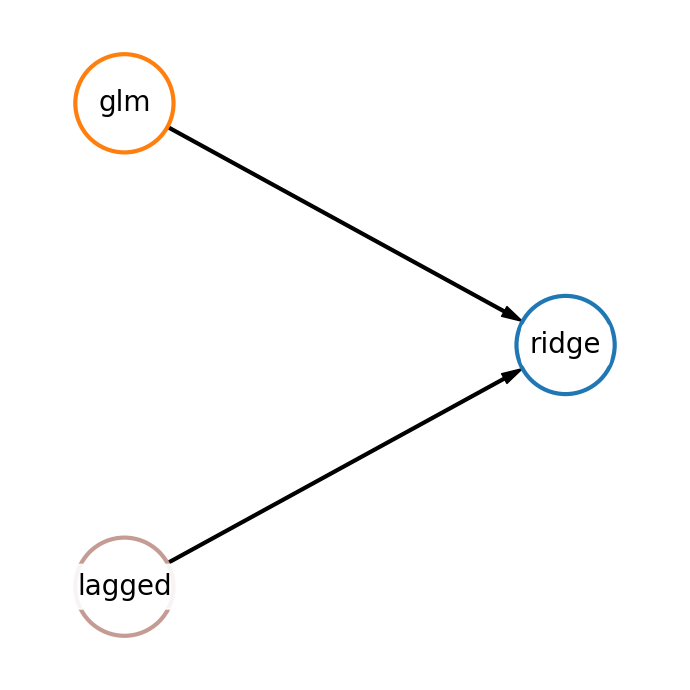

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:44:17,515 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
lagged - {'window_size': 10} 
Initial metric: 1.350


2022-12-01 16:44:18,031 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
lagged - {'window_size': 10} 
Initial metric: 1.350
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008431 seconds


2022-12-01 16:44:18,060 - build_posterior_wrapper took 0.008431 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:44:18,065 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007120 seconds


2022-12-01 16:44:18,631 - build_posterior_wrapper took 0.007120 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.350649


2022-12-01 16:44:18,639 - TPE using 1/1 trials with best loss 1.350649
 20%|██        | 2/10 [00:01<00:12,  1.60s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011446 seconds


2022-12-01 16:44:20,243 - build_posterior_wrapper took 0.011446 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.350649


2022-12-01 16:44:20,250 - TPE using 2/2 trials with best loss 1.350649
 30%|███       | 3/10 [00:03<00:13,  1.88s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013097 seconds


2022-12-01 16:44:22,328 - build_posterior_wrapper took 0.013097 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.350649


2022-12-01 16:44:22,354 - TPE using 3/3 trials with best loss 1.350649
 40%|████      | 4/10 [00:04<00:07,  1.29s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006926 seconds


2022-12-01 16:44:22,907 - build_posterior_wrapper took 0.006926 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.350649


2022-12-01 16:44:22,923 - TPE using 4/4 trials with best loss 1.350649
 50%|█████     | 5/10 [00:06<00:07,  1.55s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009856 seconds


2022-12-01 16:44:24,838 - build_posterior_wrapper took 0.009856 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.350649


2022-12-01 16:44:24,844 - TPE using 5/5 trials with best loss 1.350649
 60%|██████    | 6/10 [00:08<00:07,  1.88s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003867 seconds


2022-12-01 16:44:27,303 - build_posterior_wrapper took 0.003867 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.350649


2022-12-01 16:44:27,317 - TPE using 6/6 trials with best loss 1.350649
 70%|███████   | 7/10 [00:09<00:04,  1.60s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004040 seconds


2022-12-01 16:44:28,352 - build_posterior_wrapper took 0.004040 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.350649


2022-12-01 16:44:28,368 - TPE using 7/7 trials with best loss 1.350649
 80%|████████  | 8/10 [00:10<00:02,  1.36s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008242 seconds


2022-12-01 16:44:29,226 - build_posterior_wrapper took 0.008242 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.350649


2022-12-01 16:44:29,231 - TPE using 8/8 trials with best loss 1.350649
 90%|█████████ | 9/10 [00:11<00:01,  1.16s/trial, best loss: 1.3506489818123493]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004063 seconds


2022-12-01 16:44:29,939 - build_posterior_wrapper took 0.004063 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.350649


2022-12-01 16:44:29,958 - TPE using 9/9 trials with best loss 1.350649
100%|██████████| 10/10 [00:13<00:00,  1.48s/trial, best loss: 1.3506489818123493]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:44:32,507 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.351 equal or better than initial (+ 5% deviation) 1.418


2022-12-01 16:44:32,520 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.351 equal or better than initial (+ 5% deviation) 1.418


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 5.285889458239712}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
lagged - {'window_size': 10}


2022-12-01 16:44:32,528 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 5.285889458239712}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.351


2022-12-01 16:44:32,535 - PipelineTuner - Final metric: 1.351


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:44:33,055 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 5.285889458239712}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
lagged - {'window_size': 10} 
Initial metric: 12.024


2022-12-01 16:44:33,565 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 5.285889458239712}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
lagged - {'window_size': 10} 
Initial metric: 12.024
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013777 seconds


2022-12-01 16:44:33,597 - build_posterior_wrapper took 0.013777 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:44:33,612 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007933 seconds


2022-12-01 16:44:34,176 - build_posterior_wrapper took 0.007933 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 7.925382


2022-12-01 16:44:34,185 - TPE using 1/1 trials with best loss 7.925382
 20%|██        | 2/10 [00:00<00:05,  1.38trial/s, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004024 seconds


2022-12-01 16:44:34,906 - build_posterior_wrapper took 0.004024 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 7.925382


2022-12-01 16:44:34,922 - TPE using 2/2 trials with best loss 7.925382
 30%|███       | 3/10 [00:01<00:04,  1.49trial/s, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004050 seconds


2022-12-01 16:44:35,537 - build_posterior_wrapper took 0.004050 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 7.925382


2022-12-01 16:44:35,554 - TPE using 3/3 trials with best loss 7.925382
 40%|████      | 4/10 [00:02<00:05,  1.02trial/s, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004027 seconds


2022-12-01 16:44:36,887 - build_posterior_wrapper took 0.004027 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 7.925382


2022-12-01 16:44:36,906 - TPE using 4/4 trials with best loss 7.925382
 50%|█████     | 5/10 [00:03<00:04,  1.19trial/s, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004234 seconds


2022-12-01 16:44:37,514 - build_posterior_wrapper took 0.004234 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 7.925382


2022-12-01 16:44:37,531 - TPE using 5/5 trials with best loss 7.925382
 60%|██████    | 6/10 [00:04<00:04,  1.09s/trial, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003965 seconds


2022-12-01 16:44:39,028 - build_posterior_wrapper took 0.003965 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 7.925382


2022-12-01 16:44:39,044 - TPE using 6/6 trials with best loss 7.925382
 70%|███████   | 7/10 [00:05<00:03,  1.10s/trial, best loss: 7.925382114878761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003882 seconds


2022-12-01 16:44:40,143 - build_posterior_wrapper took 0.003882 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 7.925382


2022-12-01 16:44:40,160 - TPE using 7/7 trials with best loss 7.925382
 80%|████████  | 8/10 [00:07<00:02,  1.37s/trial, best loss: 7.26506085086339] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010700 seconds


2022-12-01 16:44:42,099 - build_posterior_wrapper took 0.010700 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 7.265061


2022-12-01 16:44:42,104 - TPE using 8/8 trials with best loss 7.265061
 90%|█████████ | 9/10 [00:09<00:01,  1.34s/trial, best loss: 7.26506085086339]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005621 seconds


2022-12-01 16:44:43,373 - build_posterior_wrapper took 0.005621 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 7.265061


2022-12-01 16:44:43,387 - TPE using 9/9 trials with best loss 7.265061
100%|██████████| 10/10 [00:09<00:00,  1.10s/trial, best loss: 7.26506085086339]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:44:46,029 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.265 equal or better than initial (+ 5% deviation) 12.625


2022-12-01 16:44:46,042 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.265 equal or better than initial (+ 5% deviation) 12.625


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 8.348560689607432}
glm - {'family': 'gaussian', 'link': 'log'}
lagged - {'window_size': 448}


2022-12-01 16:44:46,051 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, glm, lagged]}
ridge - {'alpha': 8.348560689607432}
glm - {'family': 'gaussian', 'link': 'log'}
lagged - {'window_size': 448}


CRITICAL:root:PipelineTuner - Final metric: 7.265


2022-12-01 16:44:46,059 - PipelineTuner - Final metric: 7.265
Fitting pipeline №6


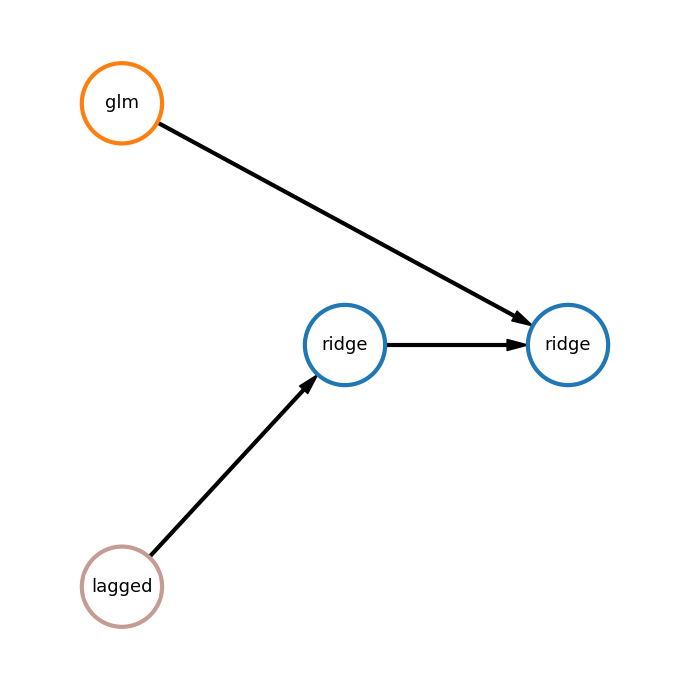

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:44:48,895 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.350


2022-12-01 16:44:49,391 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.350
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005683 seconds


2022-12-01 16:44:49,416 - build_posterior_wrapper took 0.005683 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:44:49,424 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004960 seconds


2022-12-01 16:44:49,996 - build_posterior_wrapper took 0.004960 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.732630


2022-12-01 16:44:50,003 - TPE using 1/1 trials with best loss 2.732630
 20%|██        | 2/10 [00:00<00:07,  1.14trial/s, best loss: 1.8603629720298074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007516 seconds


2022-12-01 16:44:50,885 - build_posterior_wrapper took 0.007516 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.860363


2022-12-01 16:44:50,899 - TPE using 2/2 trials with best loss 1.860363
 30%|███       | 3/10 [00:02<00:09,  1.29s/trial, best loss: 1.8603629720298074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007483 seconds


2022-12-01 16:44:52,454 - build_posterior_wrapper took 0.007483 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.860363


2022-12-01 16:44:52,465 - TPE using 3/3 trials with best loss 1.860363
 40%|████      | 4/10 [00:03<00:06,  1.11s/trial, best loss: 1.8603629720298074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006263 seconds


2022-12-01 16:44:53,368 - build_posterior_wrapper took 0.006263 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.860363


2022-12-01 16:44:53,378 - TPE using 4/4 trials with best loss 1.860363
 50%|█████     | 5/10 [00:04<00:05,  1.12s/trial, best loss: 1.8603629720298074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012008 seconds


2022-12-01 16:44:54,493 - build_posterior_wrapper took 0.012008 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.860363


2022-12-01 16:44:54,509 - TPE using 5/5 trials with best loss 1.860363
 60%|██████    | 6/10 [00:05<00:04,  1.22s/trial, best loss: 1.8603629720298074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.018521 seconds


2022-12-01 16:44:55,904 - build_posterior_wrapper took 0.018521 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.860363


2022-12-01 16:44:55,915 - TPE using 6/6 trials with best loss 1.860363
 70%|███████   | 7/10 [00:06<00:03,  1.16s/trial, best loss: 1.6201416147928007]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004409 seconds


2022-12-01 16:44:56,934 - build_posterior_wrapper took 0.004409 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.620142


2022-12-01 16:44:56,950 - TPE using 7/7 trials with best loss 1.620142
 80%|████████  | 8/10 [00:08<00:02,  1.16s/trial, best loss: 1.6201416147928007]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008991 seconds


2022-12-01 16:44:58,110 - build_posterior_wrapper took 0.008991 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.620142


2022-12-01 16:44:58,116 - TPE using 8/8 trials with best loss 1.620142
 90%|█████████ | 9/10 [00:10<00:01,  1.61s/trial, best loss: 1.6201416147928007]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012907 seconds


2022-12-01 16:45:00,698 - build_posterior_wrapper took 0.012907 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.620142


2022-12-01 16:45:00,729 - TPE using 9/9 trials with best loss 1.620142
100%|██████████| 10/10 [00:12<00:00,  1.33s/trial, best loss: 1.6201416147928007]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:45:02,844 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 1.620 worse than initial (+ 5% deviation) 1.418


2022-12-01 16:45:02,860 - PipelineTuner - Return init pipeline due to the fact that obtained metric 1.620 worse than initial (+ 5% deviation) 1.418


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}


2022-12-01 16:45:02,868 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.620


2022-12-01 16:45:02,878 - PipelineTuner - Final metric: 1.620


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 16:45:03,506 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 5.362878778010362}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 4.513937239686009}
lagged - {'window_size': 132} 
Initial metric: 14.470


2022-12-01 16:45:04,268 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 5.362878778010362}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 4.513937239686009}
lagged - {'window_size': 132} 
Initial metric: 14.470
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009132 seconds


2022-12-01 16:45:04,327 - build_posterior_wrapper took 0.009132 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 16:45:04,342 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012267 seconds


2022-12-01 16:45:05,089 - build_posterior_wrapper took 0.012267 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 7.281102


2022-12-01 16:45:05,106 - TPE using 1/1 trials with best loss 7.281102
 20%|██        | 2/10 [00:02<00:19,  2.42s/trial, best loss: 7.281101587630449]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015629 seconds


2022-12-01 16:45:07,524 - build_posterior_wrapper took 0.015629 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 7.281102


2022-12-01 16:45:07,538 - TPE using 2/2 trials with best loss 7.281102
 30%|███       | 3/10 [00:04<00:16,  2.32s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007040 seconds


2022-12-01 16:45:09,753 - build_posterior_wrapper took 0.007040 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 3.515922


2022-12-01 16:45:09,761 - TPE using 3/3 trials with best loss 3.515922
 40%|████      | 4/10 [00:06<00:13,  2.22s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005468 seconds


2022-12-01 16:45:11,853 - build_posterior_wrapper took 0.005468 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 3.515922


2022-12-01 16:45:11,861 - TPE using 4/4 trials with best loss 3.515922
 50%|█████     | 5/10 [00:07<00:07,  1.60s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016632 seconds


2022-12-01 16:45:12,524 - build_posterior_wrapper took 0.016632 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 3.515922


2022-12-01 16:45:12,539 - TPE using 5/5 trials with best loss 3.515922
 60%|██████    | 6/10 [00:08<00:06,  1.58s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014235 seconds


2022-12-01 16:45:14,063 - build_posterior_wrapper took 0.014235 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 3.515922


2022-12-01 16:45:14,074 - TPE using 6/6 trials with best loss 3.515922
 70%|███████   | 7/10 [00:09<00:04,  1.34s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011437 seconds


2022-12-01 16:45:14,935 - build_posterior_wrapper took 0.011437 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 3.515922


2022-12-01 16:45:14,945 - TPE using 7/7 trials with best loss 3.515922
 80%|████████  | 8/10 [00:10<00:02,  1.14s/trial, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006591 seconds


2022-12-01 16:45:15,673 - build_posterior_wrapper took 0.006591 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 3.515922


2022-12-01 16:45:15,684 - TPE using 8/8 trials with best loss 3.515922
 90%|█████████ | 9/10 [00:11<00:00,  1.01trial/s, best loss: 3.5159216195863565]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005585 seconds


2022-12-01 16:45:16,344 - build_posterior_wrapper took 0.005585 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 3.515922


2022-12-01 16:45:16,362 - TPE using 9/9 trials with best loss 3.515922
100%|██████████| 10/10 [00:11<00:00,  1.32s/trial, best loss: 3.5159216195863565]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 16:45:19,161 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 3.516 equal or better than initial (+ 5% deviation) 15.194


2022-12-01 16:45:19,169 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 3.516 equal or better than initial (+ 5% deviation) 15.194


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 8.03930136839957}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 2.87019558296478}
lagged - {'window_size': 410}


2022-12-01 16:45:19,176 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}
ridge - {'alpha': 8.03930136839957}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 2.87019558296478}
lagged - {'window_size': 410}


CRITICAL:root:PipelineTuner - Final metric: 3.516


2022-12-01 16:45:19,181 - PipelineTuner - Final metric: 3.516


In [41]:
x = conf_int_maker(model = model, number_models =5,pipelines_show = True)

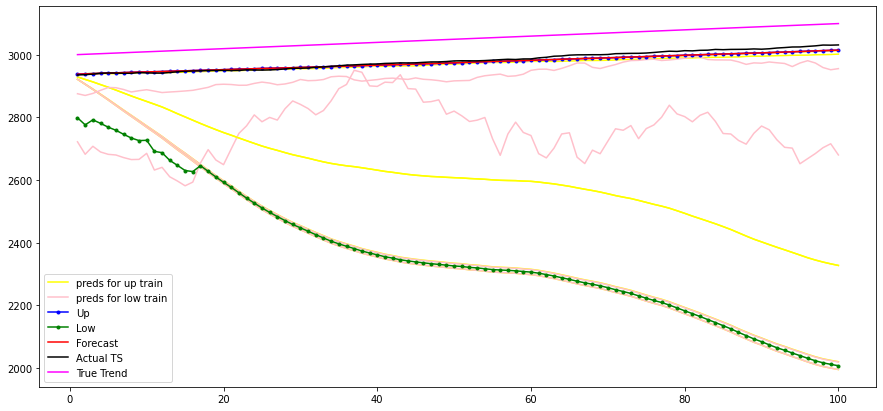

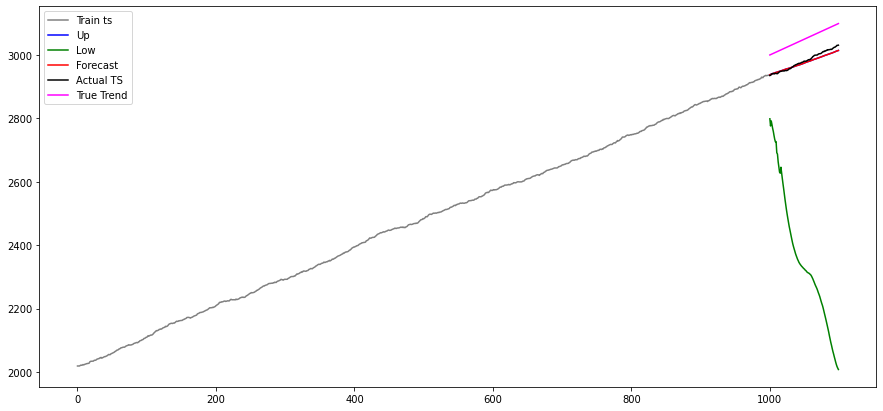

In [42]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)